<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib

ModuleNotFoundError: No module named 'dlib'

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [ ]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [ ]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.

    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.

    Returns:
        numpy.ndarray: The result image.
    '''

    # Load the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    # Download the pre-trained model: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    

    # Detect faces in the face image
    faces = detector(face)

    # Iterate over the detected faces
    for face in faces:
        # Detect the landmarks on the face
        landmarks = predictor(face, dlib.rectangle(0, 0, face.shape[0], face.shape[1]))

        # Select the four points for affine transformation
        pts = np.array([(landmarks.part(30).x, landmarks.part(30).y),  # Nose tip
                        (landmarks.part(8).x, landmarks.part(8).y),    # Chin
                        (landmarks.part(36).x, landmarks.part(36).y),  # Left corner of the mouth
                        (landmarks.part(45).x, landmarks.part(45).y)]) # Right corner of the mouth

        # Calculate the affine transformation matrix
        M = cv2.getAffineTransform(pts[:3], pts[:3] + np.array([0, 50]))

        # Apply the affine transformation to the mask image
        mask_transformed = cv2.warpAffine(mask, M, (face.shape[1], face.shape[0]))

        # Create a binary mask from the mask image
        mask_binary = cv2.cvtColor(mask_transformed, cv2.COLOR_BGR2GRAY)
        ret, mask_binary = cv2.threshold(mask_binary, 10, 255, cv2.THRESH_BINARY)

        # Invert the binary mask
        mask_inv = cv2.bitwise_not(mask_binary)

        # Apply the mask to the face image
        face_masked = cv2.bitwise_and(face, face, mask=mask_inv)
        mask_overlayed = cv2.bitwise_and(mask_transformed, mask_transformed, mask=mask_binary)
        result = cv2.add(face_masked, mask_overlayed)

    return result


<h3><font color = "#079e05"> Show the result </font></h3>

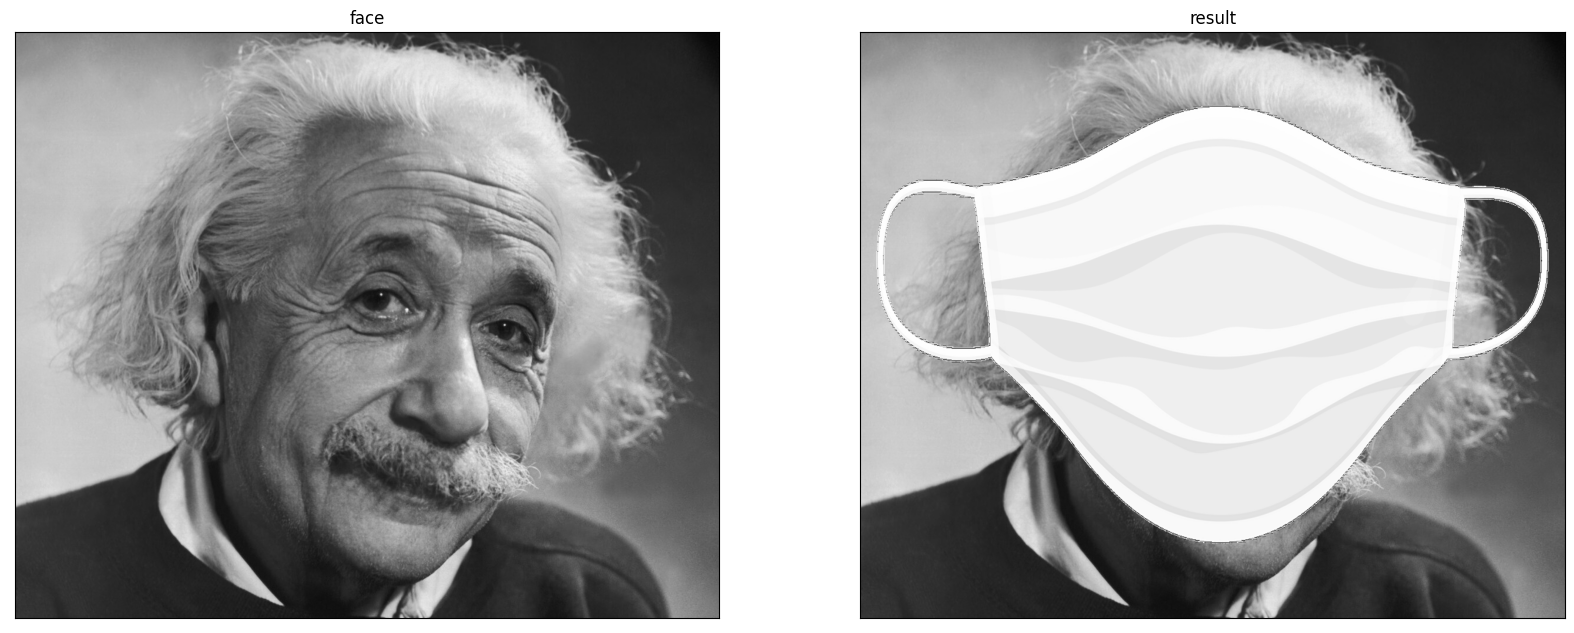

In [15]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')